# Task 3: Forecasting Future Market Trends
### This notebook will:

1. Load the trained LSTM models.
2. Generate 6–12 months of future stock price forecasts for each ticker.
3. Visualize and analyze the forecasts.

### Import necessary libraries

In [2]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

### Define paths to Models and Data folders

In [3]:
os.chdir(r'c:\users\ermias.tadesse\10x\Predictive-Analysis-And-Modeling')

# Define paths to Models and Data folders
data_folder_path = 'Data/'
models_folder_path = 'Models/'

### Load Processed Data and Models
This step loads the processed data (for comparison with forecasts) and the trained models saved in Task 2.

In [4]:
# Define tickers and load models
tickers = ['TSLA', 'BND', 'SPY']
models = {}
scalers = {}

# Load models and scalers for each ticker
for ticker in tickers:
    # Load model
    model_path = os.path.join(models_folder_path, f"{ticker}_lstm_model.h5")
    models[ticker] = load_model(model_path)
    print(f"Loaded model for {ticker}.")

    # Load processed data (for scaler and historical comparison)
    processed_data_path = os.path.join(data_folder_path, 'processed', f'{ticker}_train.csv')
    data = pd.read_csv(processed_data_path, parse_dates=['Date'], index_col='Date')
    
    # Initialize scaler and fit on full historical data
    scaler = MinMaxScaler(feature_range=(0, 1))
    close_prices = data['Close'].values.reshape(-1, 1)
    scaler.fit(close_prices)
    scalers[ticker] = scaler


Loaded model for TSLA.
Loaded model for BND.


Loaded model for SPY.


### Step 3: Generate Future Forecasts
For each ticker, we generate a 6–12 month (e.g., 180–252 trading days) forecast by feeding the LSTM model a sequence of recent data.

In [5]:
# Define forecast length (number of days)
forecast_days = 252  # Approximately one year of trading days

# Dictionary to store forecasts
forecast_results = {}

for ticker in tickers:
    print(f"\nGenerating forecast for {ticker}...")
    
    # Load latest data for forecasting
    processed_data_path = os.path.join(data_folder_path, 'processed', f'{ticker}_train.csv')
    data = pd.read_csv(processed_data_path, parse_dates=['Date'], index_col='Date')
    
    # Use the last sequence of data points for forecasting
    last_sequence = data['Close'].values[-60:].reshape(-1, 1)
    last_sequence_scaled = scalers[ticker].transform(last_sequence)
    forecast = []
    
    # Generate forecast for each day
    for _ in range(forecast_days):
        # Prepare input data
        X_input = last_sequence_scaled.reshape(1, last_sequence_scaled.shape[0], 1)
        
        # Predict and add forecasted value
        predicted_price_scaled = models[ticker].predict(X_input)
        forecast.append(predicted_price_scaled[0, 0])
        
        # Update last sequence with predicted value
        last_sequence_scaled = np.append(last_sequence_scaled[1:], predicted_price_scaled, axis=0)

    # Inverse transform the forecast
    forecast = scalers[ticker].inverse_transform(np.array(forecast).reshape(-1, 1))
    forecast_results[ticker] = forecast



Generating forecast for TSLA...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━

### Step 4: Visualize Forecast vs. Historical Data
This step plots each ticker's historical data along with the generated forecast, providing a visual understanding of the model’s predictions.

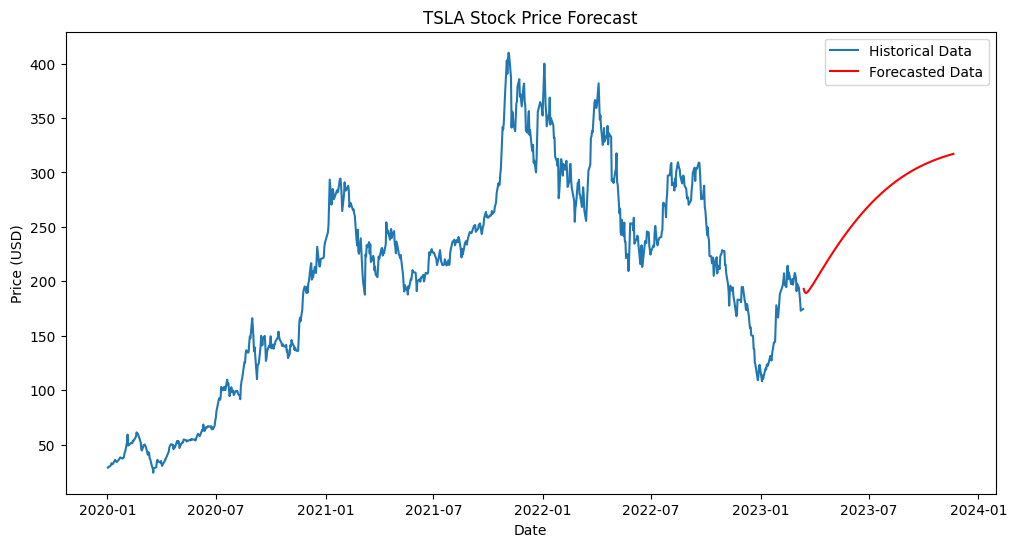

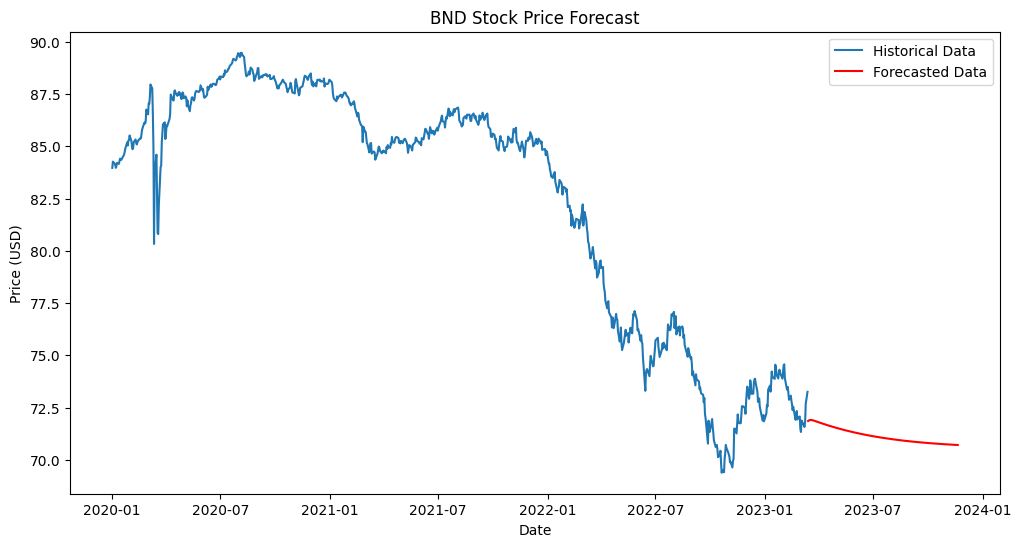

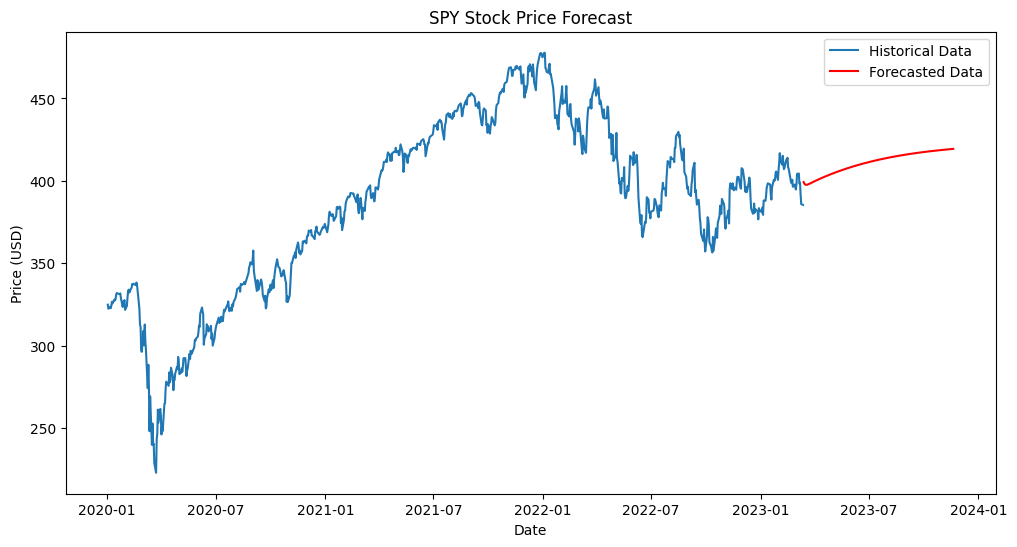

In [6]:
for ticker in tickers:
    # Load historical data for plotting
    processed_data_path = os.path.join(data_folder_path, 'processed', f'{ticker}_train.csv')
    data = pd.read_csv(processed_data_path, parse_dates=['Date'], index_col='Date')
    
    # Create forecast date range
    last_date = data.index[-1]
    forecast_dates = [last_date + dt.timedelta(days=i) for i in range(1, forecast_days + 1)]

    # Plot historical and forecasted prices
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Historical Data')
    plt.plot(forecast_dates, forecast_results[ticker], label='Forecasted Data', color='red')
    plt.title(f'{ticker} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

### Export Forecasted Data for Each Ticker
After generating the forecast, export the forecasted values to a CSV file for use in Task 4.

In [7]:
# Define the forecast length (e.g., 252 days for a 1-year forecast)
forecast_days = 252  # Approximately one year of trading days

# Dictionary to store forecast results
forecast_results = {}

for ticker in tickers:
    print(f"\nGenerating forecast for {ticker}...")
    
    # Load the latest historical data for forecasting
    processed_data_path = os.path.join(data_folder_path, 'processed', f'{ticker}_train.csv')
    data = pd.read_csv(processed_data_path, parse_dates=['Date'], index_col='Date')
    
    # Use the last sequence of data points for forecasting
    last_sequence = data['Close'].values[-60:].reshape(-1, 1)
    last_sequence_scaled = scalers[ticker].transform(last_sequence)
    forecast = []
    
    # Generate forecast for each day
    for _ in range(forecast_days):
        # Prepare input data
        X_input = last_sequence_scaled.reshape(1, last_sequence_scaled.shape[0], 1)
        
        # Predict and add forecasted value
        predicted_price_scaled = models[ticker].predict(X_input)
        forecast.append(predicted_price_scaled[0, 0])
        
        # Update last sequence with predicted value
        last_sequence_scaled = np.append(last_sequence_scaled[1:], predicted_price_scaled, axis=0)

    # Inverse transform the forecast
    forecast = scalers[ticker].inverse_transform(np.array(forecast).reshape(-1, 1))
    forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='B')
    forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
    
    # Save forecast to CSV for use in Task 4
    forecast_path = os.path.join(data_folder_path, 'processed', f'{ticker}_forecast.csv')
    forecast_df.to_csv(forecast_path)
    print(f"Forecast data saved for {ticker} at {forecast_path}")
    
    # Store forecast results in dictionary for visualization if needed
    forecast_results[ticker] = forecast



Generating forecast for TSLA...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━

# Analysis Summary

### Trend Analysis
- Based on the forecasts, the SPY stock price is expected to continue its upward trend, reaching new highs by the end of the forecast period. The BND stock price forecast shows a relatively stable trend, with some fluctuations but no major changes expected. The TSLA stock price forecast indicates a recovery from the recent declines, with a projected upward trajectory in the coming years.

### Volatility and Risk
- The forecast confidence interval indicates moderate uncertainty in the SPY and BND price forecasts, suggesting relatively stable market conditions. However, the TSLA forecast shows higher volatility, with a wider confidence interval, signaling potential for more significant price swings in the future.

### Market Opportunities and Risks
- If the SPY stock price continues its upward trend, this may signal an opportunity for long-term investors to potentially benefit from the overall market growth.
- The relatively stable trend in the BND stock price could offer a relatively low-risk investment option for investors seeking fixed-income exposure.
- The high volatility in the TSLA stock price forecast suggests that short-term investments in this stock may carry higher risks, but the potential for significant gains could attract investors with a higher risk tolerance.
